In [1]:
# !pip install pyspark
# !pip install findspark

In [2]:
import findspark; findspark.init()
import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns

import sys; sys.path.append("../../")
from DataExploration.DataExploration import read_data 
import CorrelationAnalysis

### Spark session

In [4]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("DiagnosticAnalysis")\
    .config('spark.sql.execution.arrow.pyspark.enabled', True) \
    .config('spark.sql.session.timeZone', 'UTC') \
    .config('spark.driver.memory','32G') \
    .config('spark.ui.showConsoleProgress', True) \
    .config('spark.sql.repl.eagerEval.enabled', True) \
    .getOrCreate()

sc=spark.sparkContext

### Correlation matrix between numerical features

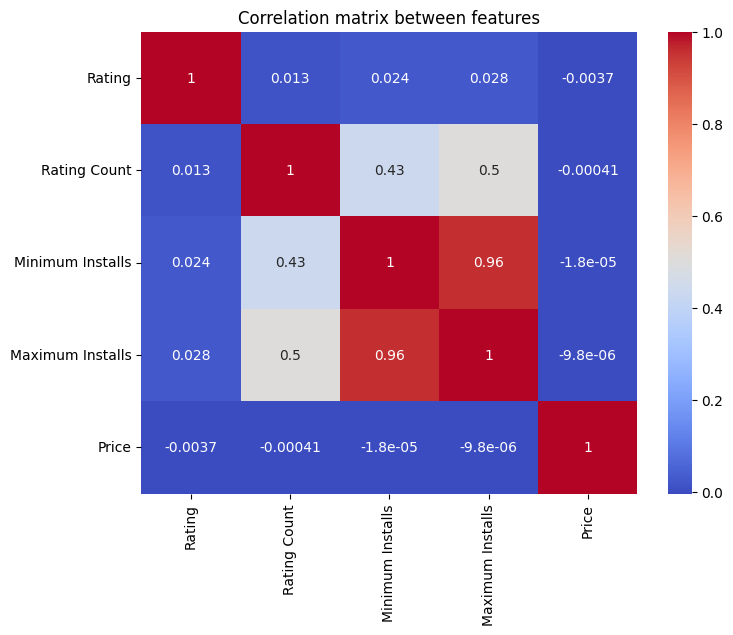

In [5]:
df =read_data(spark, features='Numerical')
CorrelationAnalysis.numerical_corr(df)

### Pearson Correlation

+--------------------+
| corr(Rating, Price)|
+--------------------+
|-0.00367454016468...|
+--------------------+



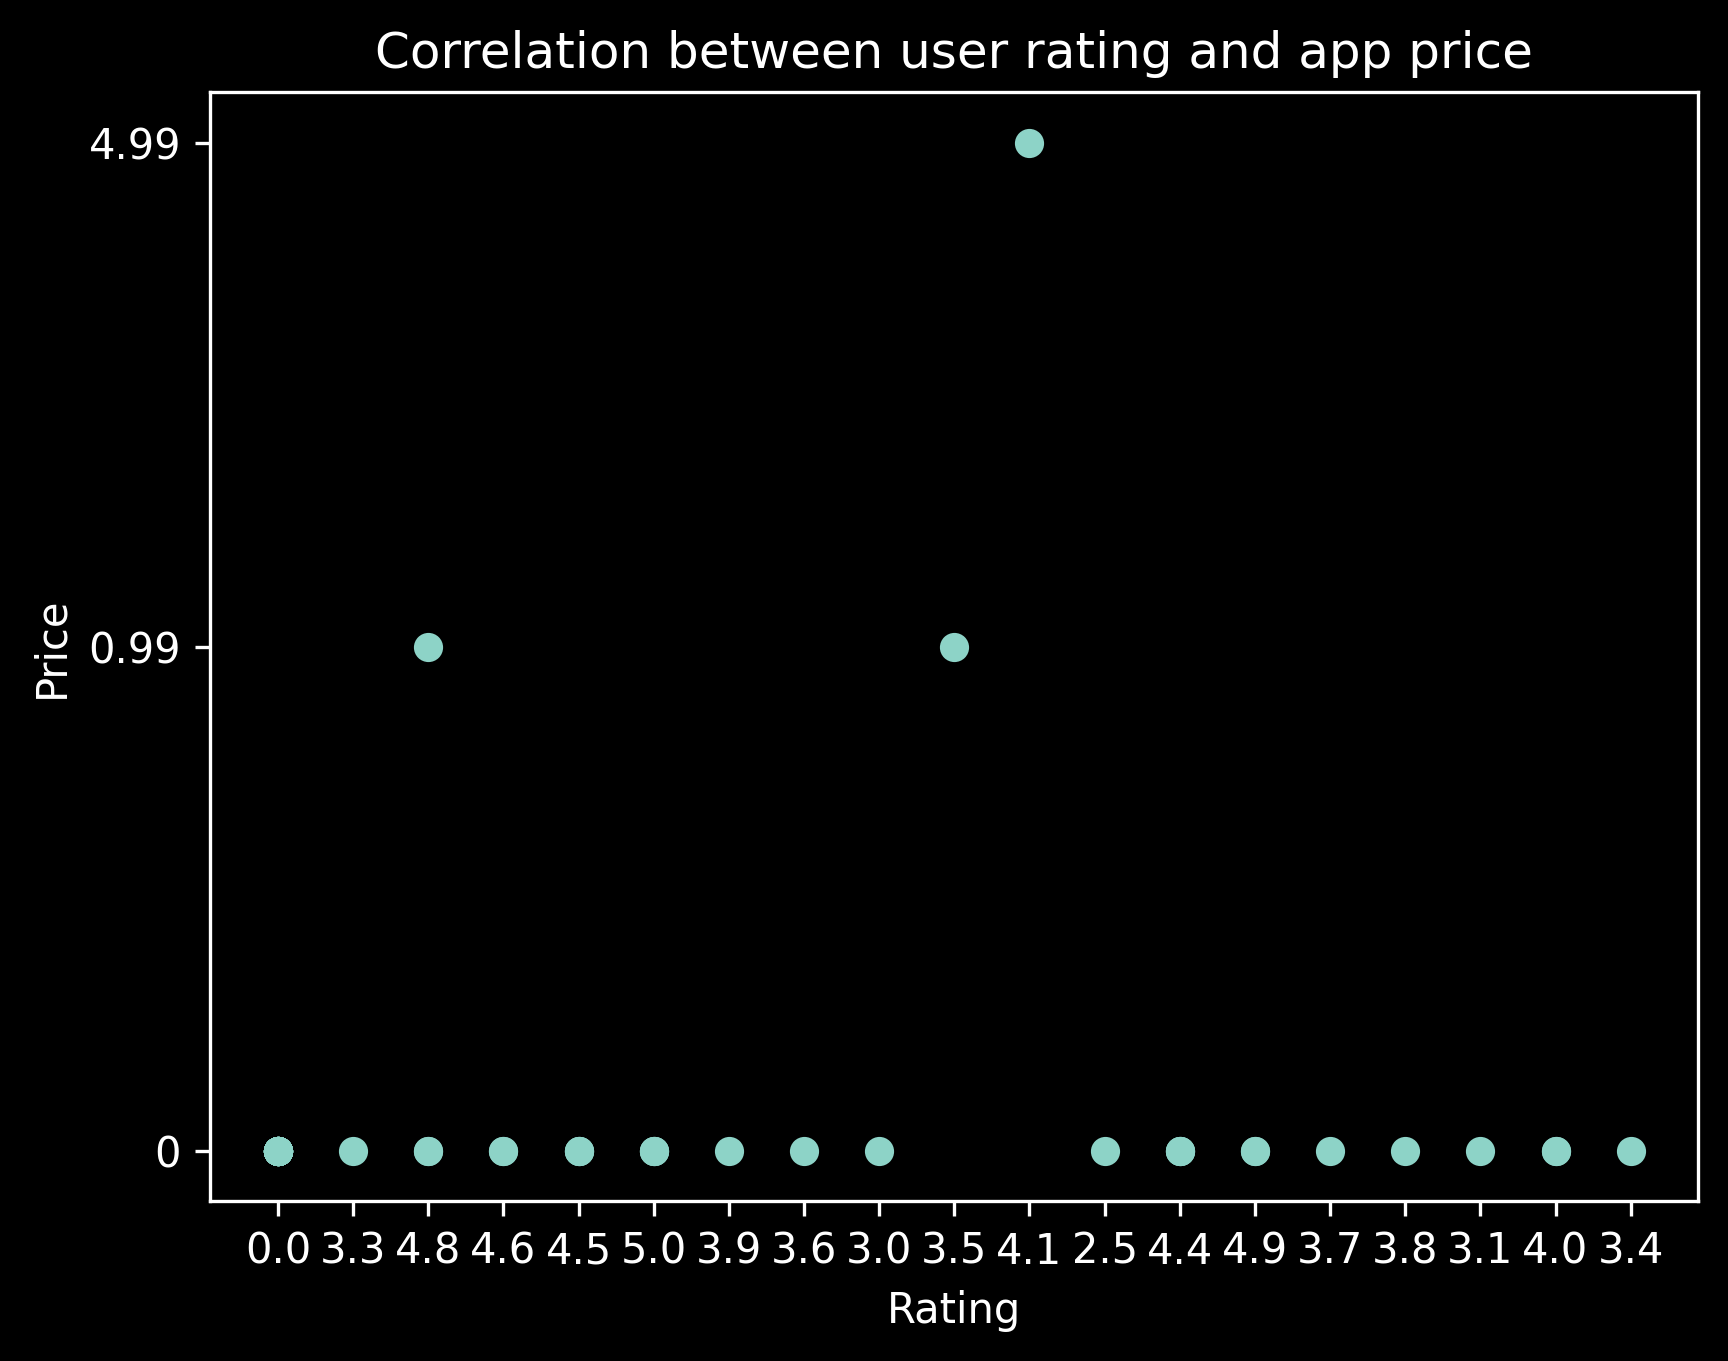

In [6]:
'''
Correlation between user rating and app price.
'''
df =read_data(spark)
CorrelationAnalysis.numerical_col_corr(df, "Rating", "Price")